In [74]:
!conda env list

# conda environments:
#
base                     /home/thuanguyen1085/anaconda3
tvnEnv0007_dataMana_plot  *  /home/thuanguyen1085/anaconda3/envs/tvnEnv0007_dataMana_plot



In [75]:
import pandas as pd

def import_google_sheet_to_dataframe(url, file_name):
    try:
        # Convert the Google Sheets link to a CSV export link
        csv_url = url.replace('/edit?usp=sharing', '/export?format=csv')
        
        # Read the data into a pandas DataFrame, using the first row as column names
        df = pd.read_csv(csv_url, sep=None, engine='python', header=0)
    except pd.errors.ParserError as e:
        print(f"Error reading CSV: {e}")
        return None

    # Print the DataFrame to ensure it is loaded correctly
    print("DataFrame loaded:")
    print(df.head())

    # Save the DataFrame to a local CSV file
    df.to_csv(f'{file_name}.csv', index=False)

    # Confirm the DataFrame has been saved
    print(f"DataFrame has been saved to '{file_name}.csv'")

    # Return the DataFrame
    return df

# Example usage
google_sheet_url = 'https://docs.google.com/spreadsheets/d/1ryCqaBQ3GlMyuN2K4JA4dYIQRKZEOhHuy6jP8qJPXi0/edit?usp=sharing'
file_name = 'expMacFlask_0001'

df = import_google_sheet_to_dataframe(google_sheet_url, file_name)


DataFrame loaded:
  experiment target_molecule   strain plasmid clone_detail condition  \
0      LV222  Salicylic Acid   DBE007    NONE      Control  glycerol   
1      LV222  Salicylic Acid   DBE007    NONE      Control  glycerol   
2      LV222  Salicylic Acid   DBE007    NONE      Control  glycerol   
3      LV222  Salicylic Acid  DBE1634    NONE       Parent  glycerol   
4      LV222  Salicylic Acid  DBE1634    NONE       Parent  glycerol   

   fill_volume  shake_speed_rpm vessel  tempt  chorismate  salicylic_acid  \
0          0.6             1000   96WP   32.5          47               0   
1          0.6             1000   96WP   32.5          24               0   
2          0.6             1000   96WP   32.5          58               0   
3          0.6             1000   96WP   32.5          33               0   
4          0.6             1000   96WP   32.5          79               0   

   od_init  od_final    mu  time resting_condition  
0    0.505    13.233  0.15    22 

In [76]:
df

,experiment,target_molecule,strain,plasmid,clone_detail,condition,fill_volume,shake_speed_rpm,vessel,tempt,chorismate,salicylic_acid,od_init,od_final,mu,time,resting_condition
0,LV222,Salicylic Acid,DBE007,NONE,Control,glycerol,0.6,1000,96WP,32.5,47,0,0.505,13.233,0.15,22,no
1,LV222,Salicylic Acid,DBE007,NONE,Control,glycerol,0.6,1000,96WP,32.5,24,0,0.478,13.183,0.15,22,no
2,LV222,Salicylic Acid,DBE007,NONE,Control,glycerol,0.6,1000,96WP,32.5,58,0,0.438,13.295,0.16,22,no
3,LV222,Salicylic Acid,DBE1634,NONE,Parent,glycerol,0.6,1000,96WP,32.5,33,0,0.528,13.428,0.15,22,no
4,LV222,Salicylic Acid,DBE1634,NONE,Parent,glycerol,0.6,1000,96WP,32.5,79,0,0.497,13.297,0.15,22,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,LV222,Salicylic Acid,DBE1635,pDB1549,dbe007_dtyrr,glycerol_iptg_induce,0.6,1000,96WP,32.5,0,440,0.521,2.739,0.08,22,yes
284,LV222,Salicylic Acid,DBE1635,pDB1549,dbe007_dtyrr,glycerol_iptg_induce,0.6,1000,96WP,32.5,0,356,0.483,2.111,0.07,22,yes
285,LV222,Salicylic Acid,DBE1636,pDB1550,dbe007_dtyrr,glycerol_iptg_induce,0.6,1000,96WP,32.5,0,398,0.536,2.278,0.07,22,yes
286,LV222,Salicylic Acid,DBE1636,pDB1550,dbe007_dtyrr,glycerol_iptg_induce,0.6,1000,96WP,32.5,0,272,0.564,2.868,0.07,22,yes


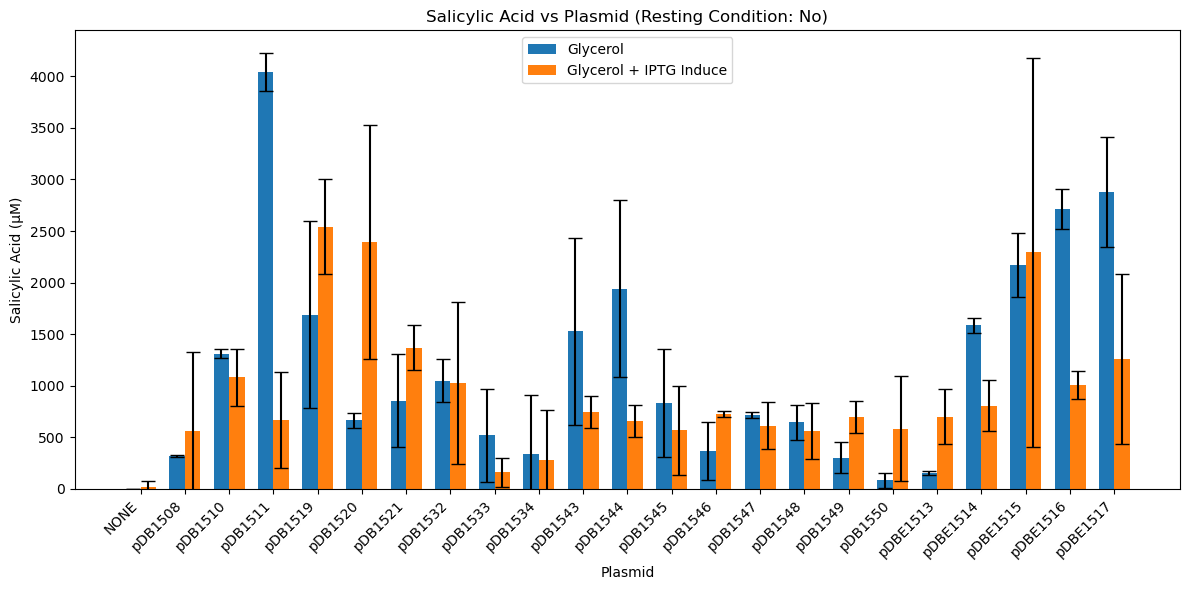

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is the DataFrame already loaded

# Filter the DataFrame for the specific conditions
glycerol_non_resting_df = df[(df['condition'] == 'glycerol') & (df['resting_condition'] == 'no')].copy()
glycerol_iptg_non_resting_df = df[(df['condition'] == 'glycerol_iptg_induce') & (df['resting_condition'] == 'no')].copy()

# Ensure salicylic_acid is numeric
glycerol_non_resting_df.loc[:, 'salicylic_acid'] = pd.to_numeric(glycerol_non_resting_df['salicylic_acid'], errors='coerce')
glycerol_iptg_non_resting_df.loc[:, 'salicylic_acid'] = pd.to_numeric(glycerol_iptg_non_resting_df['salicylic_acid'], errors='coerce')

# Drop rows with NaN values in salicylic_acid
glycerol_non_resting_df = glycerol_non_resting_df.dropna(subset=['salicylic_acid'])
glycerol_iptg_non_resting_df = glycerol_iptg_non_resting_df.dropna(subset=['salicylic_acid'])

if glycerol_non_resting_df.empty or glycerol_iptg_non_resting_df.empty:
    print("No data available to plot after filtering.")
else:
    # Calculate mean and standard deviation for salicylic_acid by plasmid
    glycerol_non_resting_summary = glycerol_non_resting_df.groupby('plasmid')['salicylic_acid'].agg(['mean', 'std']).reset_index()
    glycerol_iptg_non_resting_summary = glycerol_iptg_non_resting_df.groupby('plasmid')['salicylic_acid'].agg(['mean', 'std']).reset_index()

    # Merge the summaries to ensure all plasmids are represented
    summary_df = pd.merge(glycerol_non_resting_summary, glycerol_iptg_non_resting_summary, on='plasmid', suffixes=('_glycerol', '_glycerol_iptg'))

    # Plot the data with error bars
    fig, ax = plt.subplots(figsize=(12, 6))
    width = 0.35  # the width of the bars
    x = range(len(summary_df))

    # Plot glycerol bars
    ax.bar([pos - width/2 for pos in x], summary_df['mean_glycerol'], width, yerr=summary_df['std_glycerol'], label='Glycerol', capsize=5)

    # Plot glycerol_iptg_induce bars next to glycerol bars
    ax.bar([pos + width/2 for pos in x], summary_df['mean_glycerol_iptg'], width, yerr=summary_df['std_glycerol_iptg'], label='Glycerol + IPTG Induce', capsize=5)

    plt.xlabel('Plasmid')
    plt.ylabel('Salicylic Acid (µM)')
    plt.title('Salicylic Acid vs Plasmid (Resting Condition: No)')
    plt.xticks(ticks=x, labels=summary_df['plasmid'], rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()

    # Set y-axis minimum to 0
    ax.set_ylim(bottom=0)
    
    # Save the figure
    output_file = 'salicylic_acid_vs_plasmid_non_resting.png'
    plt.savefig(output_file)

    # Show the plot
    plt.show()


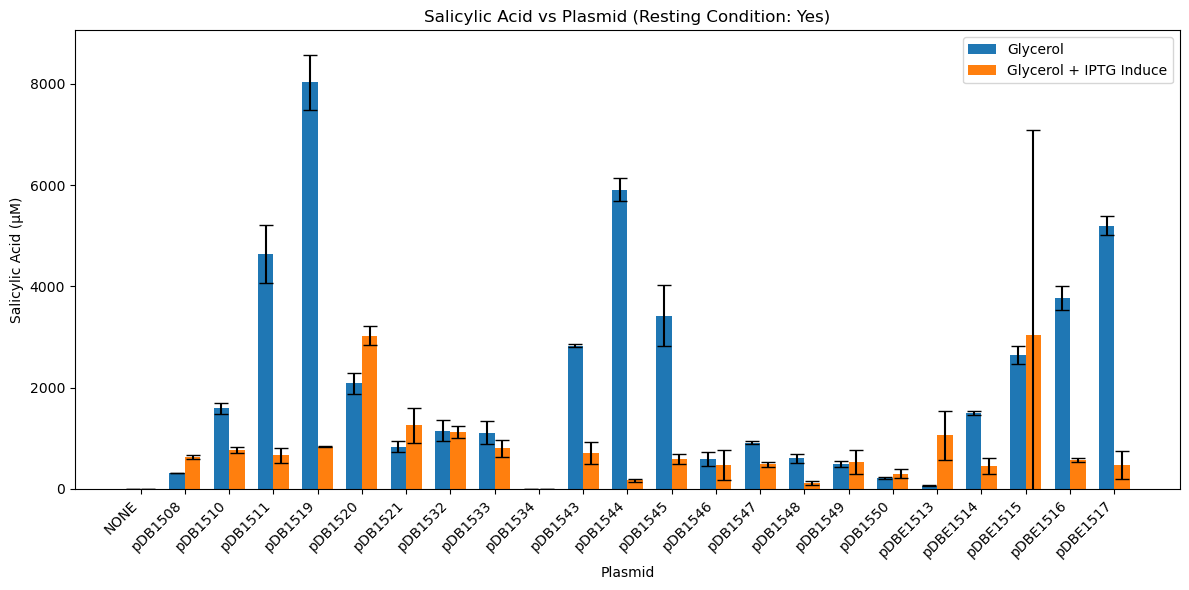

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is the DataFrame already loaded

# Filter the DataFrame for the specific conditions
glycerol_df = df[(df['condition'] == 'glycerol') & (df['resting_condition'] == 'yes')].copy()
glycerol_iptg_df = df[(df['condition'] == 'glycerol_iptg_induce') & (df['resting_condition'] == 'yes')].copy()

# Ensure salicylic_acid is numeric
glycerol_df.loc[:, 'salicylic_acid'] = pd.to_numeric(glycerol_df['salicylic_acid'], errors='coerce')
glycerol_iptg_df.loc[:, 'salicylic_acid'] = pd.to_numeric(glycerol_iptg_df['salicylic_acid'], errors='coerce')

# Drop rows with NaN values in salicylic_acid
glycerol_df = glycerol_df.dropna(subset=['salicylic_acid'])
glycerol_iptg_df = glycerol_iptg_df.dropna(subset=['salicylic_acid'])

if glycerol_df.empty or glycerol_iptg_df.empty:
    print("No data available to plot after filtering.")
else:
    # Calculate mean and standard deviation for salicylic_acid by plasmid
    glycerol_summary = glycerol_df.groupby('plasmid')['salicylic_acid'].agg(['mean', 'std']).reset_index()
    glycerol_iptg_summary = glycerol_iptg_df.groupby('plasmid')['salicylic_acid'].agg(['mean', 'std']).reset_index()

    # Merge the summaries to ensure all plasmids are represented
    summary_df = pd.merge(glycerol_summary, glycerol_iptg_summary, on='plasmid', suffixes=('_glycerol', '_glycerol_iptg'))

    # Plot the data with error bars
    fig, ax = plt.subplots(figsize=(12, 6))
    width = 0.35  # the width of the bars
    x = range(len(summary_df))

    # Plot glycerol bars
    ax.bar([pos - width/2 for pos in x], summary_df['mean_glycerol'], width, yerr=summary_df['std_glycerol'], label='Glycerol', capsize=5)

    # Plot glycerol_iptg_induce bars next to glycerol bars
    ax.bar([pos + width/2 for pos in x], summary_df['mean_glycerol_iptg'], width, yerr=summary_df['std_glycerol_iptg'], label='Glycerol + IPTG Induce', capsize=5)

    plt.xlabel('Plasmid')
    plt.ylabel('Salicylic Acid (µM)')
    plt.title('Salicylic Acid vs Plasmid (Resting Condition: Yes)')
    plt.xticks(ticks=x, labels=summary_df['plasmid'], rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()

    # Set y-axis minimum to 0
    ax.set_ylim(bottom=0)
    
    # Save the figure
    output_file = 'salicylic_acid_vs_plasmid.png'
    plt.savefig(output_file)

    # Show the plot
    plt.show()


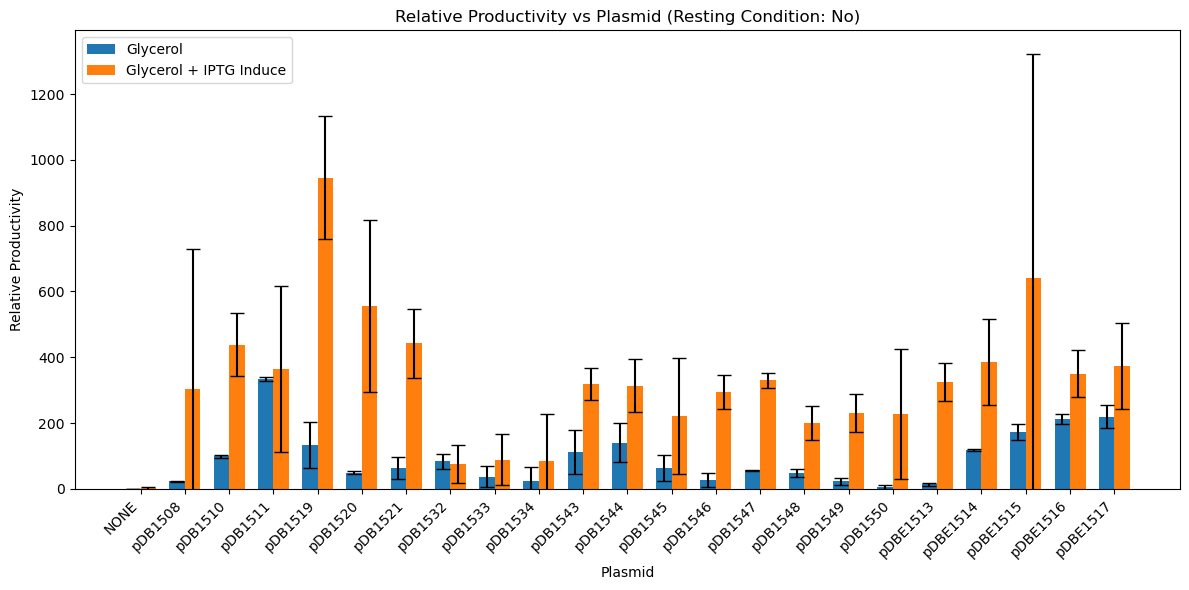

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is the DataFrame already loaded

# Strip whitespace from 'resting_condition' column
df['resting_condition'] = df['resting_condition'].str.strip()

# Add a new column for the relative productivity
df['relative_productivity'] = df['salicylic_acid'] / df['od_final']

# Filter the DataFrame for the specific conditions
glycerol_non_resting_df = df[(df['condition'] == 'glycerol') & (df['resting_condition'] == 'no')].copy()
glycerol_iptg_non_resting_df = df[(df['condition'] == 'glycerol_iptg_induce') & (df['resting_condition'] == 'no')].copy()

# Ensure relative_productivity is numeric
glycerol_non_resting_df.loc[:, 'relative_productivity'] = pd.to_numeric(glycerol_non_resting_df['relative_productivity'], errors='coerce')
glycerol_iptg_non_resting_df.loc[:, 'relative_productivity'] = pd.to_numeric(glycerol_iptg_non_resting_df['relative_productivity'], errors='coerce')

# Drop rows with NaN values in relative_productivity
glycerol_non_resting_df = glycerol_non_resting_df.dropna(subset=['relative_productivity'])
glycerol_iptg_non_resting_df = glycerol_iptg_non_resting_df.dropna(subset=['relative_productivity'])

if glycerol_non_resting_df.empty or glycerol_iptg_non_resting_df.empty:
    print("No data available to plot after filtering.")
else:
    # Calculate mean and standard deviation for relative_productivity by plasmid
    glycerol_non_resting_summary = glycerol_non_resting_df.groupby('plasmid')['relative_productivity'].agg(['mean', 'std']).reset_index()
    glycerol_iptg_non_resting_summary = glycerol_iptg_non_resting_df.groupby('plasmid')['relative_productivity'].agg(['mean', 'std']).reset_index()

    # Merge the summaries to ensure all plasmids are represented
    summary_df = pd.merge(glycerol_non_resting_summary, glycerol_iptg_non_resting_summary, on='plasmid', suffixes=('_glycerol', '_glycerol_iptg'))

    # Plot the data with error bars
    fig, ax = plt.subplots(figsize=(12, 6))
    width = 0.35  # the width of the bars
    x = range(len(summary_df))

    # Plot glycerol bars
    ax.bar([pos - width/2 for pos in x], summary_df['mean_glycerol'], width, yerr=summary_df['std_glycerol'], label='Glycerol', capsize=5)

    # Plot glycerol_iptg_induce bars next to glycerol bars
    ax.bar([pos + width/2 for pos in x], summary_df['mean_glycerol_iptg'], width, yerr=summary_df['std_glycerol_iptg'], label='Glycerol + IPTG Induce', capsize=5)

    plt.xlabel('Plasmid')
    plt.ylabel('Relative Productivity')
    plt.title('Relative Productivity vs Plasmid (Resting Condition: No)')
    plt.xticks(ticks=x, labels=summary_df['plasmid'], rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()

    # Set y-axis minimum to 0
    ax.set_ylim(bottom=0)
    
    # Save the figure
    output_file = 'relative_productivity_vs_plasmid_non_resting.png'
    plt.savefig(output_file)

    # Show the plot
    plt.show()


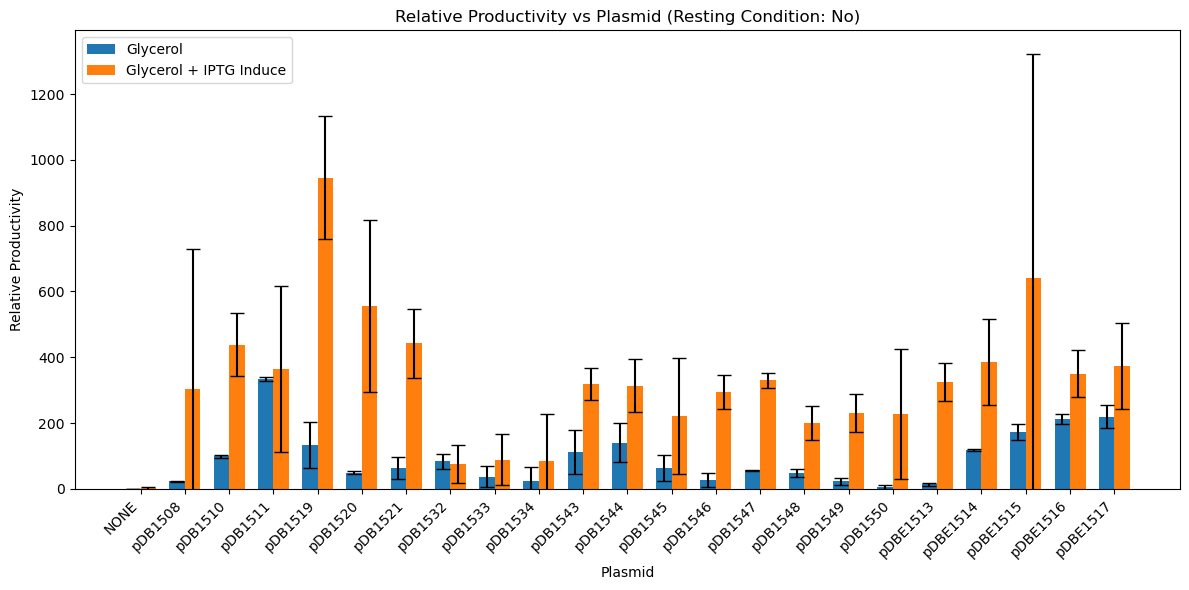

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is the DataFrame already loaded

# Strip whitespace from 'resting_condition' column
df['resting_condition'] = df['resting_condition'].str.strip()

# Add a new column for the relative productivity
df['relative_productivity'] = df['salicylic_acid'] / df['od_final']

# Filter the DataFrame for the specific conditions
glycerol_non_resting_df = df[(df['condition'] == 'glycerol') & (df['resting_condition'] == 'no')].copy()
glycerol_iptg_non_resting_df = df[(df['condition'] == 'glycerol_iptg_induce') & (df['resting_condition'] == 'no')].copy()

# Ensure relative_productivity is numeric
glycerol_non_resting_df.loc[:, 'relative_productivity'] = pd.to_numeric(glycerol_non_resting_df['relative_productivity'], errors='coerce')
glycerol_iptg_non_resting_df.loc[:, 'relative_productivity'] = pd.to_numeric(glycerol_iptg_non_resting_df['relative_productivity'], errors='coerce')

# Drop rows with NaN values in relative_productivity
glycerol_non_resting_df = glycerol_non_resting_df.dropna(subset=['relative_productivity'])
glycerol_iptg_non_resting_df = glycerol_iptg_non_resting_df.dropna(subset=['relative_productivity'])

if glycerol_non_resting_df.empty or glycerol_iptg_non_resting_df.empty:
    print("No data available to plot after filtering.")
else:
    # Calculate mean and standard deviation for relative_productivity by plasmid
    glycerol_non_resting_summary = glycerol_non_resting_df.groupby('plasmid')['relative_productivity'].agg(['mean', 'std']).reset_index()
    glycerol_iptg_non_resting_summary = glycerol_iptg_non_resting_df.groupby('plasmid')['relative_productivity'].agg(['mean', 'std']).reset_index()

    # Merge the summaries to ensure all plasmids are represented
    summary_df = pd.merge(glycerol_non_resting_summary, glycerol_iptg_non_resting_summary, on='plasmid', suffixes=('_glycerol', '_glycerol_iptg'))

    # Plot the data with error bars
    fig, ax = plt.subplots(figsize=(12, 6))
    width = 0.35  # the width of the bars
    x = range(len(summary_df))

    # Plot glycerol bars
    ax.bar([pos - width/2 for pos in x], summary_df['mean_glycerol'], width, yerr=summary_df['std_glycerol'], label='Glycerol', capsize=5)

    # Plot glycerol_iptg_induce bars next to glycerol bars
    ax.bar([pos + width/2 for pos in x], summary_df['mean_glycerol_iptg'], width, yerr=summary_df['std_glycerol_iptg'], label='Glycerol + IPTG Induce', capsize=5)

    plt.xlabel('Plasmid')
    plt.ylabel('Relative Productivity')
    plt.title('Relative Productivity vs Plasmid (Resting Condition: No)')
    plt.xticks(ticks=x, labels=summary_df['plasmid'], rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()

    # Set y-axis minimum to 0
    ax.set_ylim(bottom=0)
    
    # Save the figure
    output_file = 'relative_productivity_vs_plasmid_non_resting.png'
    plt.savefig(output_file)

    # Show the plot
    plt.show()


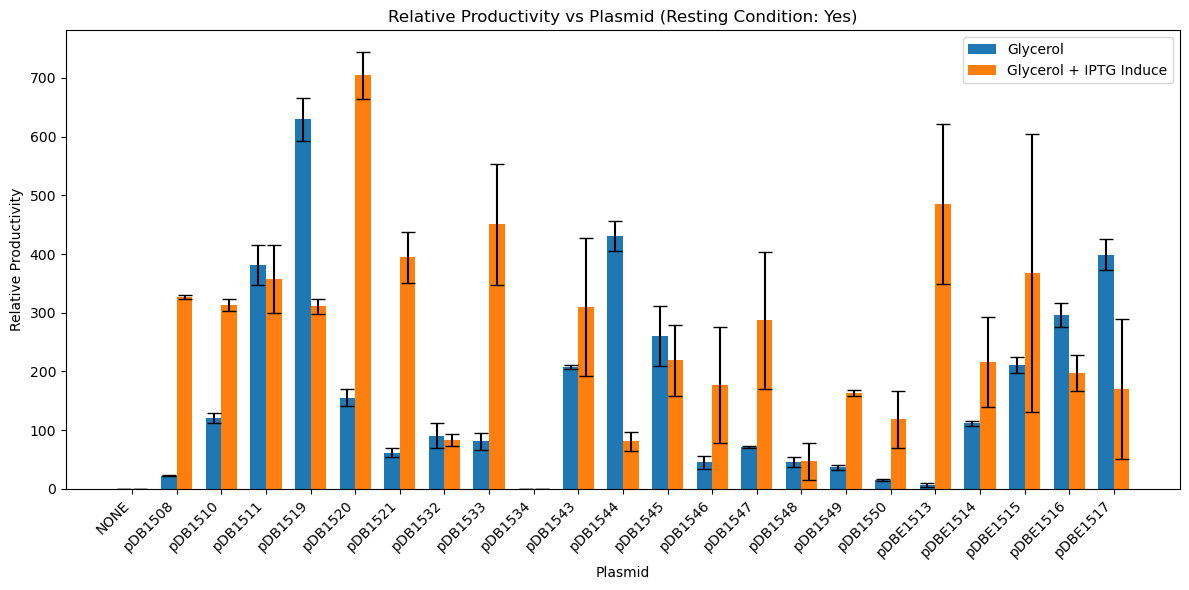

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is the DataFrame already loaded

# Strip whitespace from 'resting_condition' column
df['resting_condition'] = df['resting_condition'].str.strip()

# Add a new column for the relative productivity
df['relative_productivity'] = df['salicylic_acid'] / df['od_final']

# Filter the DataFrame for the specific conditions
glycerol_resting_df = df[(df['condition'] == 'glycerol') & (df['resting_condition'] == 'yes')].copy()
glycerol_iptg_resting_df = df[(df['condition'] == 'glycerol_iptg_induce') & (df['resting_condition'] == 'yes')].copy()

# Ensure relative_productivity is numeric
glycerol_resting_df.loc[:, 'relative_productivity'] = pd.to_numeric(glycerol_resting_df['relative_productivity'], errors='coerce')
glycerol_iptg_resting_df.loc[:, 'relative_productivity'] = pd.to_numeric(glycerol_iptg_resting_df['relative_productivity'], errors='coerce')

# Drop rows with NaN values in relative_productivity
glycerol_resting_df = glycerol_resting_df.dropna(subset=['relative_productivity'])
glycerol_iptg_resting_df = glycerol_iptg_resting_df.dropna(subset=['relative_productivity'])

if glycerol_resting_df.empty or glycerol_iptg_resting_df.empty:
    print("No data available to plot after filtering.")
else:
    # Calculate mean and standard deviation for relative_productivity by plasmid
    glycerol_resting_summary = glycerol_resting_df.groupby('plasmid')['relative_productivity'].agg(['mean', 'std']).reset_index()
    glycerol_iptg_resting_summary = glycerol_iptg_resting_df.groupby('plasmid')['relative_productivity'].agg(['mean', 'std']).reset_index()

    # Merge the summaries to ensure all plasmids are represented
    summary_df = pd.merge(glycerol_resting_summary, glycerol_iptg_resting_summary, on='plasmid', suffixes=('_glycerol', '_glycerol_iptg'))

    # Plot the data with error bars
    fig, ax = plt.subplots(figsize=(12, 6))
    width = 0.35  # the width of the bars
    x = range(len(summary_df))

    # Plot glycerol bars
    ax.bar([pos - width/2 for pos in x], summary_df['mean_glycerol'], width, yerr=summary_df['std_glycerol'], label='Glycerol', capsize=5)

    # Plot glycerol_iptg_induce bars next to glycerol bars
    ax.bar([pos + width/2 for pos in x], summary_df['mean_glycerol_iptg'], width, yerr=summary_df['std_glycerol_iptg'], label='Glycerol + IPTG Induce', capsize=5)

    plt.xlabel('Plasmid')
    plt.ylabel('Relative Productivity')
    plt.title('Relative Productivity vs Plasmid (Resting Condition: Yes)')
    plt.xticks(ticks=x, labels=summary_df['plasmid'], rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()

    # Set y-axis minimum to 0
    ax.set_ylim(bottom=0)
    
    # Save the figure
    output_file = 'relative_productivity_vs_plasmid_resting.png'
    plt.savefig(output_file)

    # Show the plot
    plt.show()
